# Generalización del modelo de regresión lineal

*Autor:* **Andrés Manuel Prieto Álvarez**

*Asesor:* **Gilberto Vargas Cano**

*Materia:* **Computación blanda**

### Caso de estudio: **Dataset de boston**

El dataset de boston es un famoso dataset usado en el mundo del maching learning para el estudio de regresiones lineales; para el caso de estudio se desea genealizar el modelo de regresióón linela sobre este mismo, siendo así nuestro objetivo a lo largo de este paper el poder generar un modelo transversas que pueda usarse para generar varias regresiones lineales sobre los datos que tenemos; sienndo que este modelo podría extrapolarse a otros datasets similares

###Tecnologias a usar:

Para nuestro modelo usaremos Python, de ahí el que usemos cuadernos Jupyter para la generación de este archivo; de este usaremos las siguientes librerías:

* sklearn: Nos proporcionará el dataset y ayuda para generar unos de los modelos de entrenamiento

* utils: Una librería que nos ayudará con el manejo de directorios, esta es de autoría del profesor Gilberto Vargas Cano, como notas del autor:

  * "*Directorios: chart y data en el directorio de trabajo*"
  * "*DATA_DIR es el directorio de los datos*"
  * "*CHART_DIR es el directorio de los gráficos generados*"

* matplotlib: De esta librería solo tomaremos pyplot para poder generar nuestras graficas

* scipy: Nos ayudará con el tratamiento de datos y alguna gestión más

* numpy: De numpy usaremos su tratamientos de datos y algunas facilidades para limpiar la información

* os: Como dependencia del sistema operativo

###Algunas notas:

La estructura de datos del dataset de boston puede verse como la de un diccionario con pares separados, esto implica entre otras cosas; que posee una serie de llaves las cuales nos serán utiles para separar la información, estas llaves corresponden con los siguientes nombres y contenidos:

* data: Es el conjunto de los datos almacenados

* target: Son las columnas con el objetivo o respuesta

* feature_names: Nombres de las columnas

* DESCR: Es una descripción completa del contenido del dataset

* filename: Nombre del archivo

In [173]:
# Liberías a usar
# -----------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from utils import DATA_DIR, CHART_DIR
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import os

# Se eliminan las advertencias por el uso de funciones que
# en el futuro cambiarán
# -----------------------------------------------------------------
np.seterr(all='ignore')

# Importamos el dataset de Boston de la librería de sklearn
# -----------------------------------------------------------------
boston = datasets.load_boston()

#Algunas verificaciones (Este apartado puede omitirse)

Con animo de entender mejor el dataset y realizar ciertas comprobaciones, vease el apartado de "Algunas verificaciones"

In [158]:
# Confirmamos la carga de la información imprimiendola
# -----------------------------------------------------------------
print(boston)
print()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [159]:
# Extenderemos un poco la informacióón del apartado 
# "Algunas notas", implimiendo la descripción de
# nuestro data set
# -----------------------------------------------------------------

print('Características del dataset:')
print(boston.DESCR)

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 

In [160]:
# Varificacmos algunas caracteristicas de nuestro data set
# -----------------------------------------------------------------

print('Cantidad de datos: \n', boston.data.shape, end='\n\n')
print('Nombres columnas: \n', boston.feature_names, end='\n\n')
print('El tipo de estructura que utiliza "data": \n', type(boston.data), end='\n\n')

Cantidad de datos: 
 (506, 13)

Nombres columnas: 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

El tipo de estructura que utiliza "data": 
 <class 'numpy.ndarray'>



#Algunas consideraciones del modelo

Disponemos de 13 nubes de dispersión de datos (Iniciando en 0 hasta 12), de las cuales no todas pueden modelarse de forma lineal; para nuestro caso y a fin de apreciar la generalización del modelo, veremos las dispersiones: 5, 7 y 12 (En el eje X); comparando en cada caso contra el parametro del valor medio (Eje de las Y).

Entendiendo lo anterior de una forma más practica veremos 3 dispersiones de puntos:

* Valor medio vs número de habitaciones
* Valor medio vs distancia a los centros de empleo
* Valor medio vs valor medio de las viviendas ocupadas en miles de dolares

Con estas 3 dispersiones de puntos generaremos un modelo de regresión lineal que generalice los problemas que atañe cada dispersión de puntos

#####Nota: *Se usa la misma variable en el eje Y con animo de hacer el modelo más facil de entender, pero esto tambien se puede generalizar*

In [161]:
# Columna 5 del data set (Número de habitaciones)
# -----------------------------------------------------------------
X_numero_de_habitaciones = boston.data[:, np.newaxis, 5]

# Columna 7 del data set (Distancia respecto a los centro de empleo)
# -----------------------------------------------------------------
X_distancia = boston.data[:, np.newaxis, 7]

# Columna 12 del data set (Valor medio de las viviendas ocupadas
# por sus propietarios en miles de dólares)
# -----------------------------------------------------------------
X_owner_occupied = boston.data[:, np.newaxis, 12]


# Se definen los datos correspondientes a las etiquetas
# -----------------------------------------------------------------
y_valor_medio = boston.target

# Se define la escala rgb para los colores los colores
# r = rojo, g = verde, b = azul, m = magenta, k = negro
# -----------------------------------------------------------------
colors = [ 'r', 'g', 'b', 'm', 'k']

# Se definen los tipos de líneas (Serán usadas por las funciones)
# -----------------------------------------------------------------
linestyles = ['-', '-.', '--', ':', '-']


#Buenas practicas (Este apartado puede omitirse)

Es buena practica limpiar los datos y siguiendo estas practicas, lo haremos aquí de esa forma (Más por costumbre), a pesar de que no es necesario, puesto que; este dataset ya ha sido curado

In [162]:
# Se comprueba el número de datos incorrectos
# -----------------------------------------------------------------
print("Número de entradas incorrectas:", np.sum(np.isnan(y_valor_medio)))

# Se eliminan los datos incorrectos
# -----------------------------------------------------------------
X_numero_de_habitaciones = X_numero_de_habitaciones[~np.isnan(y_valor_medio)]
X_distancia = X_distancia[~np.isnan(y_valor_medio)]
X_owner_occupied = X_owner_occupied[~np.isnan(y_valor_medio)]
y_valor_medio = y_valor_medio[~np.isnan(y_valor_medio)]

# Se verifica la eliminacion
# -----------------------------------------------------------------
print("Datos incerrectos luego de limpiar:", np.sum(np.isnan(y_valor_medio)))

Número de entradas incorrectas: 0
Datos incerrectos luego de limpiar: 0


#Dispersiones de puntos

En este apartado veremos las graficas resultantes de los datos que hemos seleccionado arriba, para ello haremos uso de la dispersión de matplotlib llamada "scatter" que corresponde con las dispersiones de puntos que requerimos

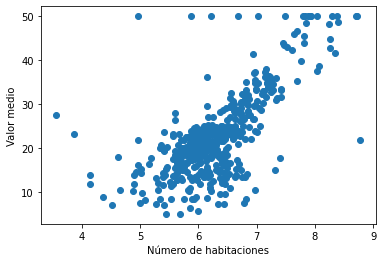

In [163]:
# Se grafican los datos correspondientes
# -----------------------------------------------------------------
plt.scatter(X_numero_de_habitaciones, y_valor_medio)
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

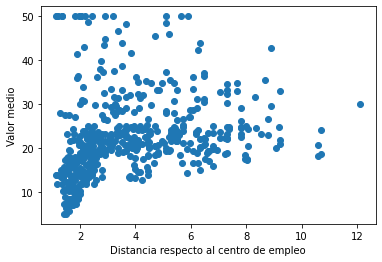

In [164]:
# Se grafican los datos correspondientes
# -----------------------------------------------------------------
plt.scatter(X_distancia, y_valor_medio)
plt.xlabel('Distancia respecto al centro de empleo')
plt.ylabel('Valor medio')
plt.show()

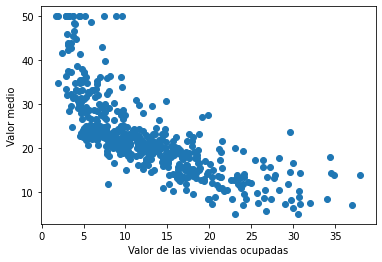

In [165]:
# Se grafican los datos correspondientes
# -----------------------------------------------------------------
plt.scatter(X_owner_occupied, y_valor_medio)
plt.xlabel('Valor de las viviendas ocupadas')
plt.ylabel('Valor medio')
plt.show()

#Generalización de las dispersiones de puntos



In [174]:
# Generalización del metodo de dibujo anterior
# -----------------------------------------------------------------
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None,
                title=None, ylabel=None, xlabel=None, skmodel=False,
                skshowtrack=False):

    # Crea una nueva figura, o activa una existente.
    # num = identificador, figsize: anchura, altura
    plt.figure(num=None, figsize=(8, 6))

    # Borra el espacio de la figura
    plt.clf()
    
    # Se especifica el tipo de grafica que se desea
    # en este caso scatter corresponde a dispersion
    # de puntos
    plt.scatter(x, y)
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    # xticks proporciona titulo más especificos a
    # los ejes X & Y
    # plt.xticks([], [])

    # Identificamos si se tiene modelo para la grafica
    # si no se posee modelo se genera uno nuevo
    if models and not skmodel:

      print("Ok")
      # Si no se define ningún valor para mx (revisar el 
      # código más adelante), el valor de mx será
      # calculado con la función linspace

      # NOTA: linspace devuelve números espaciados uniformemente 
      # durante un intervalo especificado. En este caso, sobre
      # el conjunto de valores x establecido
      if mx is None:
          mx = np.linspace(0, x[-1], 1000)

      # Aquí se realiza un ciclo
      for model, style, color in zip(models, linestyles, colors):
          plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

      # Legend especifica una pequeña etiqueta que usaremos para
      # definir una serie de caracteristicas de las diferentes
      # rectas que se van a generar
      plt.legend(["d=%i" % m.order for m in models], loc="upper left")
    
    # Identificamos si se desea usar un modelo predictivo
    # de ser así, usamos el modelo que nos brinda sklearn
    if skmodel and not models:
      X_train, X_test, y_train, y_test = train_test_split(x, y)

      # Se define la regresióón lineal como metodo
      lr = linear_model.LinearRegression()

      # Se entrena el modelo
      lr.fit(X_train, y_train)

      # Se realiza una predicción
      Y_pred = lr.predict(X_test)

      # Se grafican los datos junto con el modelo
      plt.plot(X_test, Y_pred, color='red')

      # Muestra los resultados de la predición de sklearn
      if skshowtrack:
        print()
        print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
        print()
        print('Valor de la pendiente o coeficiente "a": ', lr.coef_)
        print()
        print('Valor de la intersección o coeficiente "b": ', lr.intercept_)
        print()
        print('La ecuación del modelo es igual a:')
        print('y = ', lr.coef_, 'x ', lr.intercept_)
        print() 
        print('Precisión del modelo: ', lr.score(X_train, y_train))
        print()

    # Se agregar ordenes a la cuadricula o "plot" para con
    # la respectiva grafica
    plt.autoscale(tight=True)
    plt.ylim(ymin=0)

    # Se analiza si el eje y posee un maximo, de ser así;
    # este se asigna al paramentro de ylim() que corresponde
    # con el limite que tendrá el eje y en la grafica de plot
    if ymax:
        plt.ylim(ymax)
        print("Valor maximo de ajuste para y: ", ymax)
    
 
    # Del mismo modo que que con y se analiza si el eje x
    # posee un maximo, de ser así; este se asigna al paramentro
    # de xlim() que corresponde con el limite que tendrá el
    # eje x en la grafica de plot   
    if xmin:
        plt.xlim(xmin=xmin)
    
    # Se agregan caracteristica a la grilla del fondo de la grafica
    plt.grid(True, linestyle='-', color='0.75')
    
    # Se guardama la imagen generada por matplotlib
    # en un directorio especifico
    plt.savefig(fname)

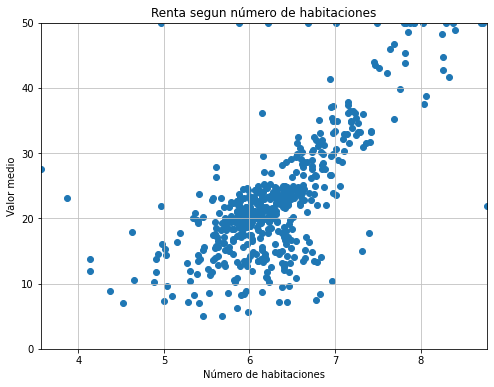

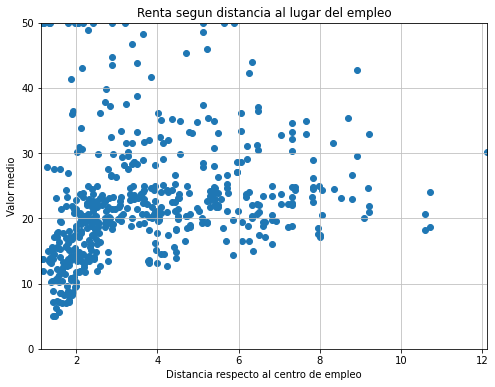

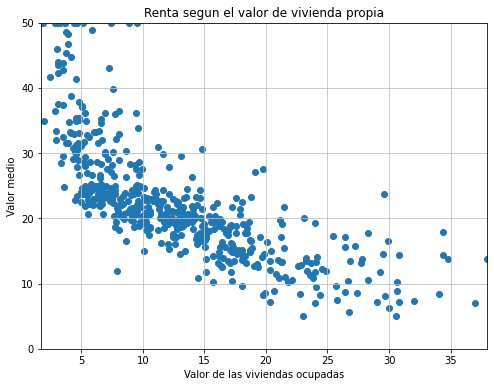

In [167]:
# Generalización de las graficas
# -----------------------------------------------------------------

# Bus de información

datos_a_graficar = [[X_numero_de_habitaciones, y_valor_medio,
                     "Renta segun número de habitaciones", "Valor medio",
                     "Número de habitaciones"],
                    [X_distancia, y_valor_medio,
                     "Renta segun distancia al lugar del empleo", "Valor medio",
                     "Distancia respecto al centro de empleo"],
                    [X_owner_occupied, y_valor_medio,
                     "Renta segun el valor de vivienda propia", "Valor medio",
                     "Valor de las viviendas ocupadas"],
                    ]

# Graficador

for grafica in datos_a_graficar:
  plot_models(grafica[0], grafica[1], None,
              os.path.join(CHART_DIR, "1400_01_01.png"), title=grafica[2],
              ylabel=grafica[3], xlabel=grafica[4])

#Implementación de sklearn

Ahora implementaremos nuestra función de graficación junto a la implementación de sklearn de la regresión lineal simple para tener un modelo predictivo completo; veamos esto sobre el bus de información anterior


DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":  [8.41434237]

Valor de la intersección o coeficiente "b":  -30.406715611605446

La ecuación del modelo es igual a:
y =  [8.41434237] x  -30.406715611605446

Precisión del modelo:  0.41772950492604544



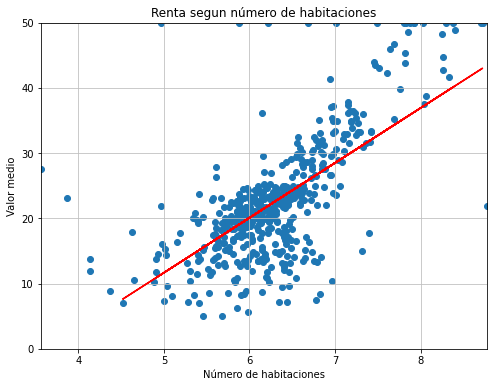

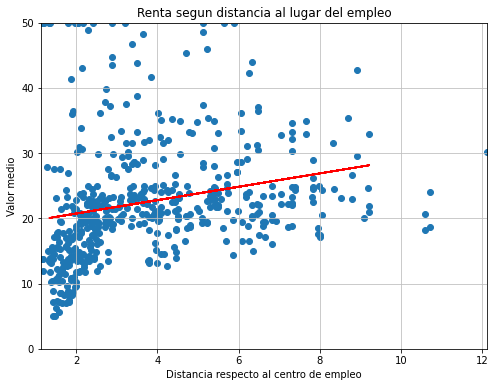

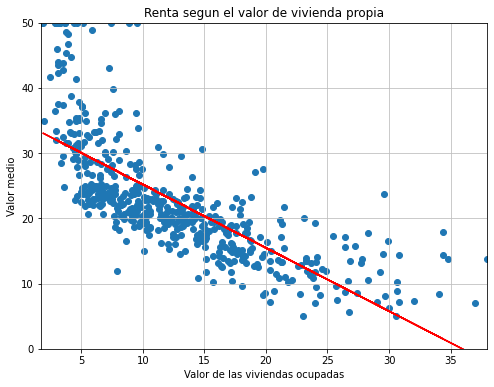

In [168]:
# Generalización de las graficas
# -----------------------------------------------------------------

# Bus de información

datos_a_graficar = [[X_numero_de_habitaciones, y_valor_medio,
                     "Renta segun número de habitaciones", "Valor medio",
                     "Número de habitaciones", True, True],
                    [X_distancia, y_valor_medio,
                     "Renta segun distancia al lugar del empleo", "Valor medio",
                     "Distancia respecto al centro de empleo", True, False],
                    [X_owner_occupied, y_valor_medio,
                     "Renta segun el valor de vivienda propia", "Valor medio",
                     "Valor de las viviendas ocupadas", True, False],
                    ]

# Graficador

for grafica in datos_a_graficar:
  plot_models(grafica[0], grafica[1], None,
              os.path.join(CHART_DIR, "1400_01_01.png"), title=grafica[2],
              ylabel=grafica[3], xlabel=grafica[4], skmodel=grafica[5],
              skshowtrack=grafica[6])

#Implementación de Scipy

Para la implementación de Scipy debemos de saldar un pequeño inconveniente, este es la dimensión del array que tenemos como entrante de sklearn, para ello usamos un aplanador y a partir de este ya podemos generalizar la expresión para los demás modelos

In [169]:
def flatter(vector):
  X_flat = []
  
  for item in range(0, len(vector)):
    X_flat.append(vector[item][0])
  
  return X_flat

In [170]:
# Crea y dibuja los modelos de datos
# -----------------------------------------------------------------
X_model = flatter(X_numero_de_habitaciones)

# print("Parámetros del modelo fp1: %s" % fp1)
# print("Error del modelo fp1:", res1)

fp1, res1, rank1, sv1, rcond1 = np.polyfit(X_model, y_valor_medio, 1, full=True)
f1 = sp.poly1d(fp1)

fp2, res2, rank2, sv2, rcond2 = np.polyfit(X_model, y_valor_medio, 2, full=True)
f2 = sp.poly1d(fp2)

f3 = sp.poly1d(np.polyfit(X_model, y_valor_medio, 3))
f10 = sp.poly1d(np.polyfit(X_model, y_valor_medio, 10))
f100 = sp.poly1d(np.polyfit(X_model, y_valor_medio, 100))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Ok
Ok
Ok


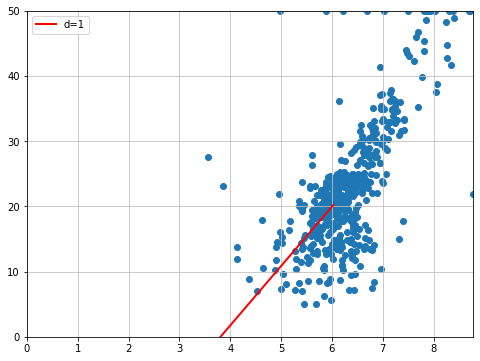

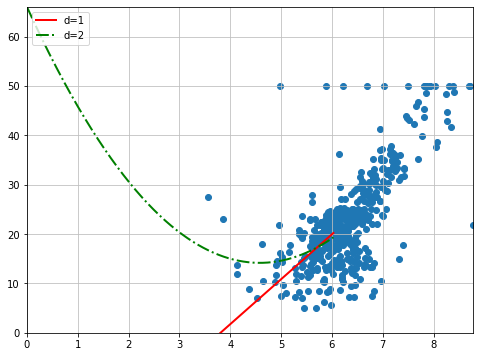

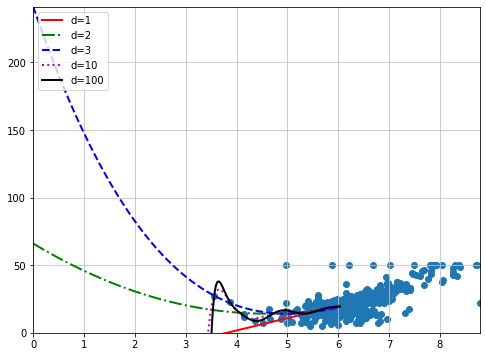

In [171]:
plot_models(X_numero_de_habitaciones, y_valor_medio, [f1], os.path.join(CHART_DIR, "1400_01_02.png"))
plot_models(X_numero_de_habitaciones, y_valor_medio, [f1, f2], os.path.join(CHART_DIR, "1400_01_03.png"))
plot_models(X_numero_de_habitaciones, y_valor_medio, [f1, f2, f3, f10, f100], os.path.join(CHART_DIR, "1400_01_04.png"))

#Generalización del modelo de Scipy

Ahora que ya tenemos todas los datos necesarios para poder graficar; procedemos a reunir el bus de datos con la expresión que se genera en el apartado anterior

In [ ]:

# Bus de información

datos_a_graficar = [[X_numero_de_habitaciones, y_valor_medio,
                     "Renta segun número de habitaciones", "Valor medio",
                     "Número de habitaciones"],
                    [X_distancia, y_valor_medio,
                     "Renta segun distancia al lugar del empleo", "Valor medio",
                     "Distancia respecto al centro de empleo"],
                    [X_owner_occupied, y_valor_medio,
                     "Renta segun el valor de vivienda propia", "Valor medio",
                     "Valor de las viviendas ocupadas"],
                    ]

# Graficador

for grafica in datos_a_graficar:
  X_model = flatter(grafica[0])
  fp1, res1, rank1, sv1, rcond1 = np.polyfit(X_model, y_valor_medio, 1, full=True)
  f1 = sp.poly1d(fp1)

  fp2, res2, rank2, sv2, rcond2 = np.polyfit(X_model, y_valor_medio, 2, full=True)
  f2 = sp.poly1d(fp2)

  f3 = sp.poly1d(np.polyfit(X_model, y_valor_medio, 3))
  f10 = sp.poly1d(np.polyfit(X_model, y_valor_medio, 10))
  f100 = sp.poly1d(np.polyfit(X_model, y_valor_medio, 100))

  plot_models(X_model, grafica[1], [f1, f2, f3, f10, f100],
              os.path.join(CHART_DIR, "1400_01_01.png"), title=grafica[2],
              ylabel=grafica[3], xlabel=grafica[4])

#Notas

La alterar la dimensión del vector de entrada, se está alterando también la dispersón de puntos, es probable que la función de aplanado de ignorando alguna particularidad; por lo cual se hace necesaria una revisión más detallada